In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [3]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

original_hist = original_model.fit(x_train, y_train, 
                                   epochs=20, batch_size=512, 
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 21ms/step - loss: 0.4416 - accuracy: 0.8248 - val_loss: 0.3269 - val_accuracy: 0.8796
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2501 - accuracy: 0.9114 - val_loss: 0.2898 - val_accuracy: 0.8852
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1961 - accuracy: 0.9306 - val_loss: 0.3044 - val_accuracy: 0.8769
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1629 - accuracy: 0.9427 - val_loss: 0.3064 - val_accuracy: 0.8790
Epoch 5/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1433 - accuracy: 0.9496 - val_loss: 0.3195 - val_accuracy: 0.8794
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1247 - accuracy: 0.9565 - val_loss: 0.3389 - val_accuracy: 0.8754
Epoch 7/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1105 - accuracy: 0.9622 - val_loss: 0.3660 - val_accuracy: 0.8719
Epoch 8/20
49

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop', 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20, batch_size=512, 
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 23ms/step - loss: 0.4932 - accuracy: 0.8092 - val_loss: 0.3816 - val_accuracy: 0.8700
Epoch 2/20
49/49 [==============================] - 1s 11ms/step - loss: 0.3018 - accuracy: 0.8996 - val_loss: 0.3069 - val_accuracy: 0.8824
Epoch 3/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2330 - accuracy: 0.9189 - val_loss: 0.2837 - val_accuracy: 0.8880
Epoch 4/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1940 - accuracy: 0.9334 - val_loss: 0.2797 - val_accuracy: 0.8880
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1687 - accuracy: 0.9424 - val_loss: 0.2860 - val_accuracy: 0.8855
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1488 - accuracy: 0.9493 - val_loss: 0.2967 - val_accuracy: 0.8832
Epoch 7/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1339 - accuracy: 0.9548 - val_loss: 0.3114 - val_accuracy: 0.8797
Epoch 8/20
49

In [6]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

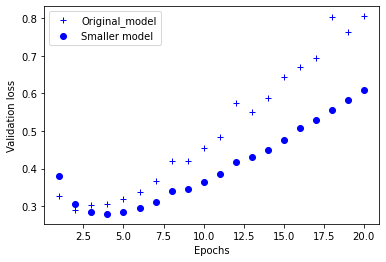

In [7]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original_model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [8]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop', 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20, batch_size=512, 
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 7s 130ms/step - loss: 0.4927 - accuracy: 0.7918 - val_loss: 0.2877 - val_accuracy: 0.8815
Epoch 2/20
49/49 [==============================] - 6s 131ms/step - loss: 0.2171 - accuracy: 0.9118 - val_loss: 0.2771 - val_accuracy: 0.8890
Epoch 3/20
49/49 [==============================] - 6s 128ms/step - loss: 0.1106 - accuracy: 0.9594 - val_loss: 0.4940 - val_accuracy: 0.8512
Epoch 4/20
49/49 [==============================] - 6s 132ms/step - loss: 0.0668 - accuracy: 0.9843 - val_loss: 0.4745 - val_accuracy: 0.8833
Epoch 5/20
49/49 [==============================] - 6s 129ms/step - loss: 0.1362 - accuracy: 0.9842 - val_loss: 0.4751 - val_accuracy: 0.8855
Epoch 6/20
49/49 [==============================] - 6s 129ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.6686 - val_accuracy: 0.8849
Epoch 7/20
49/49 [==============================] - 6s 129ms/step - loss: 0.1650 - accuracy: 0.9861 - val_loss: 0.5415 - val_accuracy: 0.8796
Epoch 

In [9]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

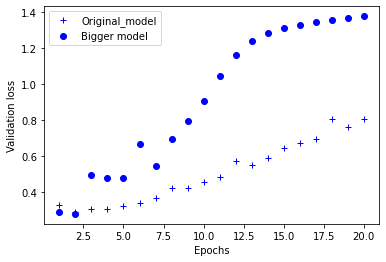

In [10]:
plt.plot(epochs, original_val_loss, 'b+', label='Original_model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [11]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

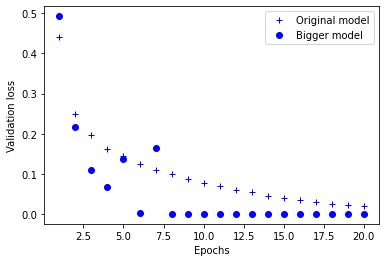

In [12]:
plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()